# Matematický software 

## Cv. 10 - Numerická derivace

Prezentace: [POSEL](MS10soubory/DifPocet_fx.pdf)

### Cognitive Apprenticeship

V tomto cvičení si ukážeme jak provádět derivaci funkci v nějakém bodě, nalézt její symbolický předpis, nalézt předpis limity a procvičíme si znalosti z předchozích hodin.

In [ ]:
!python -m pip install scipy

In [3]:
import scipy
import sympy
import matplotlib.pyplot as plt
import numpy

#### Taylorova věta

<img src="MS10_soubory/taylor.png" alt="Drawing" style="width: 700px;"/>



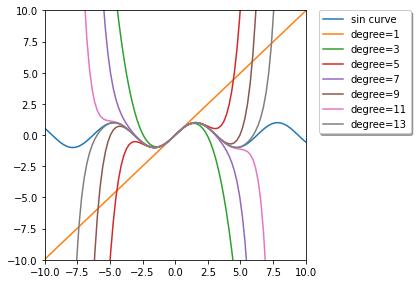

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

x = np.linspace(-10.0, 10.0, num=100)

plt.plot(x, np.sin(x), label="sin curve")

for degree in np.arange(1, 15, step=2):
    sin_taylor = approximate_taylor_polynomial(np.sin, 0, degree, 1, order=degree + 2)
    plt.plot(x, sin_taylor(x), label=f"degree={degree}")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0, shadow=True)
plt.tight_layout()
plt.axis([-10, 10, -10, 10])
plt.show()

#### Symbolické manipulace

<img src="MS10_soubory/symuprava1.png" alt="Drawing" style="width: 600px;"/>

In [14]:
sympy.simplify((1-x/y)/(x-y**2/x))

-x/(y*(x + y))

#### Kvadratická rovnice

<img src="MS10_soubory/symkvadr.png" alt="Drawing" style="width: 650px;"/>

In [18]:
quadraeq = 'a * x ** 2 + b * x + c'
vars = sympy.var('x a b c')

print(sympy.solve(quadraeq,  vars ))   # sympy solves y(a,b,c,x) for each of a, b, c, x
print(sympy.solve(quadraeq,  x ))      # sympy solves Y(a,b,c,x) for x treating a, b, c as constants

[(x, -(b*x + c)/x**2, b, c)]
[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]


#### Soustava lineární rovnic

<img src="MS10_soubory/soustava.png" alt="Drawing" style="width: 500px;"/>

In [77]:
import random
import numpy as np
import sympy
import string
import time

def print_matrix(A, b):
    print("Matrix A:")
    for row in A:
        print(row)
    print("RHS b:\n", b)

def jacobi(A, b, niteraci, x0=None):
    x = x0 if x0 else np.ones(len(A))
    D = np.diag(A)
    R = A - np.diagflat(D)
    for i in range(niteraci):
        x = (b - np.dot(R,x))/D
    return x

def cramer(A, b):
    N = A.shape[1]
    mask = np.broadcast_to(np.diag([1 for i in range(N)]), [N, N, N]).swapaxes(0, 1)
    Ai = np.where(mask, np.repeat(b, N).reshape(N, N), A)
    x = np.linalg.det(Ai) / np.linalg.det(A)
    return x

def symbolicke_reseni(A, b):
    N = A.shape[1]
    s = sympy.symbols(','.join(string.ascii_lowercase[0:N]))
    rows = []
    for i in range(N):
        str_expr = "+".join([f"{A[i,j]}*{s[j]}" for j in range(N)])
        sympy_eq = sympy.sympify(str_expr)
        rows.append(sympy.Eq(sympy_eq, b[i]))
    x = sympy.solve(rows, s)
    return x

def generate_random_matrix(n, amin, amax):
    A = np.array([[random.randint(amin, amax) for j in range(n)] for i in range(n)])
    b = np.array([random.randint(amin, amax) for i in range(n)])
    return A, b

def testcase():
    A = np.array([[4, -2, 1],[1, -3, 2],[-1, 2, 6]])
    b = np.array([1, 2, 3])
    return A, b

A, b = generate_random_matrix(n=3, amin=-10, amax=10)
#A, b = testcase()
print_matrix(A, b)

start = time.time()
x_iter = jacobi(A, b, 25)
end = time.time()
print(f"\n\nIteracni reseni (t={end-start}s):\n{x_iter}\n\n")

start = time.time()
x_cramer = cramer(A, b)
end = time.time()
print(f"Cramer reseni: (t={end-start}s):\n{x_cramer}\n\n")

start = time.time()
x_symbolicky = symbolicke_reseni(A, b)
end = time.time()
print(f"Symbolicke reseni: (t={end-start}s):\n{x_symbolicky}\n\n")

Matrix A:
[-4 10 -6]
[-10   5  -1]
[-8  5 -2]
RHS b:
 [-5  7 -5]


Iteracni reseni (t=0.0003600120544433594s):
[-2.57071300e+13  1.59937806e+13 -3.84075521e+13]


Cramer reseni: (t=0.0016560554504394531s):
[ 3.625 12.5   19.25 ]


Symbolicke reseni: (t=0.04531288146972656s):
{a: 29/8, b: 25/2, c: 77/4}




#### Limity

In [ ]:
x, y = sympy.symbols('x y')
vyraz = x*x - 2*x*y
x0 = 0
limita_vyrazu = sympy.limit(vyraz, x, x0)
print(limita_vyrazu)

<img src="MS10_soubory/limity.png" alt="Drawing" style="width: 500px;"/>

In [6]:
x = sympy.symbols('x')
vyraz = (2*x**3 - 1)/(x**2 - 2*x + 10)
x0 = 3
limita_vyrazu = sympy.limit(vyraz, x, x0)
print(limita_vyrazu)

53/13


In [11]:
x = sympy.symbols('x')
vyraz = (x**2 + x - 2)/(x - 2)
x0 = 2
limita_vyrazu = sympy.limit(vyraz, x, x0, dir='-')
print(limita_vyrazu)

-oo


In [12]:
x = sympy.symbols('x')
vyraz = sympy.exp(1/sympy.sin(x))
x0 = 0
limita_vyrazu = sympy.limit(vyraz, x, x0)
print(limita_vyrazu)

limita_vyrazu = sympy.limit(vyraz, x, x0, dir='-')
print(limita_vyrazu)

oo
0


In [10]:
x = sympy.symbols('x')
vyraz = (sympy.log(x) - 1)/(x-sympy.E)
x0 = sympy.E
limita_vyrazu = sympy.limit(vyraz, x, x0)
print(limita_vyrazu)

exp(-1)


#### Výpočet derivace

<img src="MS10_soubory/vypocetderivace.png" alt="Drawing" style="width: 600px;"/>

In [13]:
x, y = sympy.symbols('x y')
vyraz = x*x - 2*x*y

derivace_vyrazu = sympy.diff(vyraz, x)
print(derivace_vyrazu)

2*x - 2*y


<img src="MS10_soubory/numderivace.png" alt="Drawing" style="width: 300px;"/>

In [1]:
def forward_derivate(f, x0, h):
    return (f(x0+h) - f(x0))/h

def backward_derivate(f, x0, h):
    return (f(x0) - f(x0-h))/h

def central_derivate(f, x0, h):
    return (f(x0+h) - f(x0-h))/(2*h)

f = lambda x: x**2
x0 = 2
h = 0.1

print(forward_derivate(f, x0, h))
print(backward_derivate(f, x0, h))
print(central_derivate(f, x0, h))

4.100000000000001
3.9000000000000012
4.000000000000001


#### Derivace

<img src="MS10_soubory/odhadderivace.png" alt="Drawing" style="width: 600px;"/>

In [14]:
import sympy
import numpy as np

def forward_derivate(f, x0, h):
    return (f(x0+h) - f(x0))/h

def central_derivate(f, x0, h):
    return (f(x0+h) - f(x0-h))/(2*h)

x = sympy.symbols('x')
dx = sympy.diff(sympy.sin(x), x)

f = lambda x: np.sin(x)

xmin = 0
xmax = np.pi
ns = [4, 8, 12, 16, 20, 30]

for n in ns:
    xs = np.linspace(xmin, xmax, n)
    ge_forward = sum([abs(forward_derivate(f, xi, 0.001) - dx.evalf(subs={x: xi})) for xi in xs])
    ge_central = sum([abs(central_derivate(f, xi, 0.001) - dx.evalf(subs={x: xi})) for xi in xs])
    print(f"pocet intervalu: {n}, chyba dopredne: {ge_forward}, chyba central: {ge_central}\n")

pocet intervalu: 4, chyba dopredne: 0.000866358664985634, chyba central: 5.00000217340535E-7

pocet intervalu: 8, chyba dopredne: 0.00219097628452147, chyba central: 9.15660154254816E-7

pocet intervalu: 12, chyba dopredne: 0.00347790942912796, chyba central: 0.00000133777941979663

pocet intervalu: 16, chyba dopredne: 0.00475751516377877, chyba central: 0.00000176112916334958

pocet intervalu: 20, chyba dopredne: 0.00603443546949352, chyba central: 0.00000218492813723603

pocet intervalu: 30, chyba dopredne: 0.00922228993200859, chyba central: 0.00000324516834024347



<img src="MS10_soubory/derivace3body.png" alt="Drawing" style="width: 600px;"/>

In [17]:
import sympy
import numpy as np

def twopoint_forward_derivate(f, x0, h):
    return (f(x0+h) - f(x0))/h

def threepoint_forward_derivate(f, x0, h):
    #return (f(x0-h) -4*f(x0) + 3*f(x0+h))/(2*h)
    return (-3*f(x0) + 4*f(x0+h) - f(x0+2*h))/(2*h)

x = sympy.symbols('x')
dx = sympy.diff(sympy.sin(x), x)

f = lambda x: np.sin(x)

xmin = 0
xmax = np.pi
ns = [4, 8, 12, 16, 20, 30]

for n in ns:
    xs = np.linspace(xmin, xmax, n)
    ge_twopoint = sum([abs(twopoint_forward_derivate(f, xi, 0.001) - dx.evalf(subs={x: xi})) for xi in xs])
    ge_threepoint = sum([abs(threepoint_forward_derivate(f, xi, 0.001) - dx.evalf(subs={x: xi})) for xi in xs])
    print(f"pocet intervalu: {n}, chyba dvoubodove: {ge_twopoint} chyba tribodove: {ge_threepoint}\n")

pocet intervalu: 4, chyba dvoubodove: 0.000866358664985634 chyba tribodove: 9.99998963524540E-7

pocet intervalu: 8, chyba dvoubodove: 0.00219097628452147 chyba tribodove: 0.00000183131876829723

pocet intervalu: 12, chyba dvoubodove: 0.00347790942912796 chyba tribodove: 0.00000267555704935862

pocet intervalu: 16, chyba dvoubodove: 0.00475751516377877 chyba tribodove: 0.00000352225534476502

pocet intervalu: 20, chyba dvoubodove: 0.00603443546949352 chyba tribodove: 0.00000436985281733471

pocet intervalu: 30, chyba dvoubodove: 0.00922228993200859 chyba tribodove: 0.00000649033111546626

